# Example of implementation of Multinomial Logistc Regression

## Compared to Scikit Learn's implmentation

### Using Mountain Car Data for easy visualization

In [34]:
from sklearn.linear_model import LogisticRegression
from logistic_regression import MultinomialLogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Load Data

In [35]:
data = pd.read_table('mountain_car_demo.txt', sep=' ', header=0,names=['pos', 'vel', 'action', 'reward'], skiprows=1, index_col=False)
data

pos       vel  action  reward
0    -0.422633 -0.001758     0.0    -1.0
1    -0.426137 -0.003504     0.0    -1.0
2    -0.431361 -0.005225     0.0    -1.0
3    -0.438269 -0.006908     0.0    -1.0
4    -0.446809 -0.008541     0.0    -1.0
...        ...       ...     ...     ...
1247  0.344660  0.035769     2.0    -1.0
1248  0.380151  0.035491     2.0    -1.0
1249  0.415599  0.035448     2.0    -1.0
1250  0.451251  0.035652     2.0    -1.0
1251  0.487364  0.036114     2.0    -1.0

[1252 rows x 4 columns]

### Plot Data

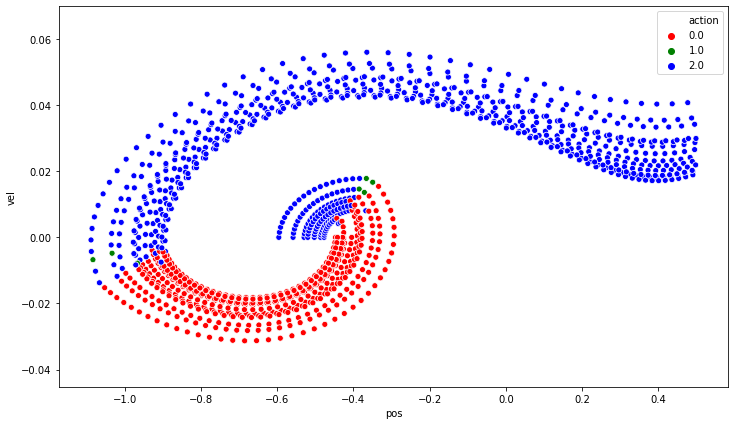

In [36]:
fig, ax = plt.subplots(figsize=(12, 7))
ax = sns.scatterplot(data.pos, data.vel, hue=data.action, palette=['red', 'green', 'blue' ])

### Results of Scikit Learn implmentation

In [37]:
sklearn_model = LogisticRegression(
    penalty='none',
    #fit_intercept=False,
    max_iter=10000,
    multi_class='multinomial',
    n_jobs=-1
).fit(
    data.drop(['reward', 'action'], axis=1),
    data.action
)

In [38]:
sklearn_model.n_iter_

array([63], dtype=int32)

In [39]:
sklearn_model.coef_

array([[   4.47952956, -262.1292474 ],
       [  -2.46571859,   88.4979203 ],
       [  -2.01381098,  173.63132711]])

In [40]:
sklearn_model.intercept_

array([ 3.74424194, -3.66184103, -0.08240091])

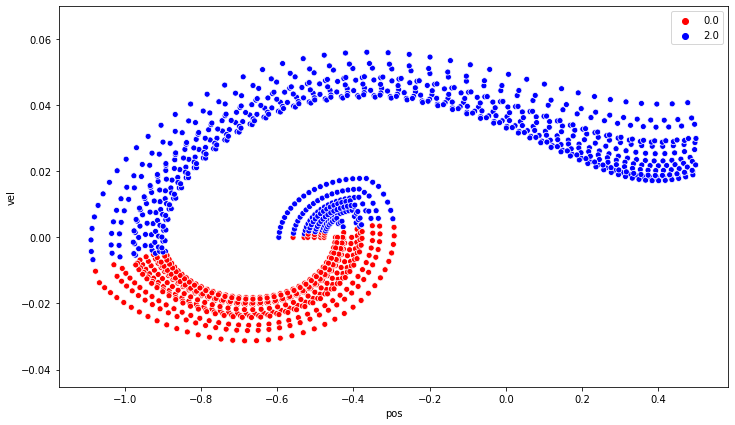

In [41]:
fig, ax = plt.subplots(figsize=(12, 7))
ax = sns.scatterplot(
    data.pos,
    data.vel,
    hue=sklearn_model.predict( data.drop(['reward', 'action'], axis=1)),
    palette=['red', 'blue' ])

### My implementation

In [42]:
X = np.array(
    [
        [
            x[0], x[1],1
        ]
        for x in data.drop(['reward', 'action'], axis=1).to_numpy()
    ]
)
y = data.action.to_numpy()
my_model = MultinomialLogisticRegression(
    alpha=0.001,
    min_iter=1000,
    max_iter=10000).fit(
        X,
        data.action.to_numpy())

In [43]:
diagnostics = my_model.diagnostics()

In [44]:
diagnostics

neg_log_like misclassification_rates  \
0     -1.74464e+06                 0.68131   
1     -1.41743e+06                0.404952   
2     -1.30856e+06                0.404952   
3     -1.25602e+06                0.404952   
4     -1.22636e+06                0.404952   
...            ...                     ...   
9997  -1.75929e+06               0.0758786   
9998  -1.75933e+06               0.0758786   
9999  -1.75937e+06               0.0758786   
10000 -1.75942e+06               0.0758786   
10001 -1.75946e+06               0.0758786   

                                               gradients  \
0      [[-160.51701761158625, 182.51535984128455, -21...   
1      [[-160.51701761158625, 182.51535984128455, -21...   
2      [[-126.21044344885888, 91.64700778583976, 34.5...   
3      [[-107.41883821649358, 58.94643589241118, 48.4...   
4      [[-93.16934515983775, 42.592502232418006, 50.5...   
...                                                  ...   
9997   [[0.04409227553588835, 0.005193759606263448, -...   
9998   [[0.04408870544602905, 0.005193471858006227, -...   
9999   [[0.044085136202738795, 0.0051931837575160955,...   
10000  [[0.04408156780573336, 0.005192895305126122, -...   
10001  [[0.044078000254444305, 0.005192606501168484, ...   

                                         delta_gradients  
0                                                      0  
1      [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, ...  
2      [[34.30657416272737, -90.86835205544479, 56.56...  
3      [[18.7916052323653, -32.70057189342858, 13.908...  
4      [[14.249493056655837, -16.353933659993174, 2.1...  
...                                                  ...  
9997   [[-3.570936826235993e-06, -2.873956992388571e-...  
9998   [[-3.570089859294967e-06, -2.8774825722166497e...  
9999   [[-3.569243290257873e-06, -2.8810049013117123e...  
10000  [[-3.5683970054378733e-06, -2.884523899737701e...  
10001  [[-3.567551289052062e-06, -2.8880395763764e-07...  

[10002 rows x 4 columns]

In [45]:
diagnostics['gradients'][8]

array([[-59.867272  ,  18.59237679,  41.27489521],
       [-10.66481205,  -0.97783438,  11.64264643],
       [  7.76287129, -66.93186087,  59.16898958]])

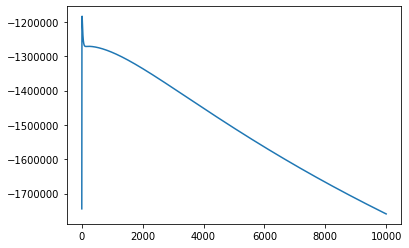

In [46]:
plt.plot(diagnostics.reset_index().index, diagnostics.neg_log_like)

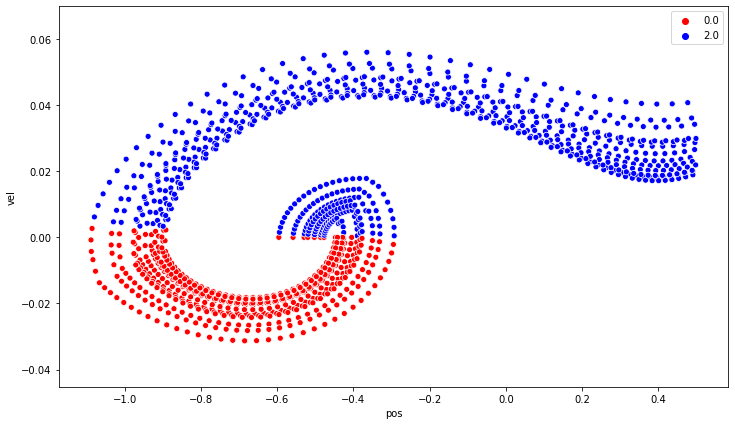

In [47]:
fig, ax = plt.subplots(figsize=(12, 7))
ax = sns.scatterplot(
    data.pos,
    data.vel,
    hue=my_model.predict(X),
    palette=[ 'red', 'blue' ])

In [48]:
my_model.parameters()

array([[  0.87227126,  -0.20303866,   1.21554985],
       [-43.00241854,   0.28442727,  42.46414241],
       [  1.66050973,  -3.10274545,   1.77354123]])

In [49]:
sklearn_model.coef_

array([[   4.47952956, -262.1292474 ],
       [  -2.46571859,   88.4979203 ],
       [  -2.01381098,  173.63132711]])

In [50]:
np.column_stack((sklearn_model.coef_, sklearn_model.intercept_.T))

array([[ 4.47952956e+00, -2.62129247e+02,  3.74424194e+00],
       [-2.46571859e+00,  8.84979203e+01, -3.66184103e+00],
       [-2.01381098e+00,  1.73631327e+02, -8.24009118e-02]])

In [61]:
probs = sklearn_model.predict_proba(data.drop(['action', 'reward'], axis=1))

In [62]:
from sklearn.preprocessing import LabelBinarizer

In [68]:
np.min(np.amax(np.multiply(probs, LabelBinarizer().fit_transform(y)), axis=1))

0.00620798648227538